In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
dir=r"C:\\Users\\vichu\\Documents\loan"
#os.chdir(r'C:\Users\prana\Desktop')
df = pd.read_csv(os.path.join(dir,"train.csv"))
df_test = pd.read_csv(os.path.join(dir,"test.csv"))
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [2]:
pd.options.display.max_seq_items = 4000

In [3]:
df_test1 = pd.read_csv(os.path.join(dir,"test.csv"))

In [4]:
y=df_train['m13']

NameError: name 'df_train' is not defined

In [61]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

## Checking for empty values

## Uni-Variate Analysis

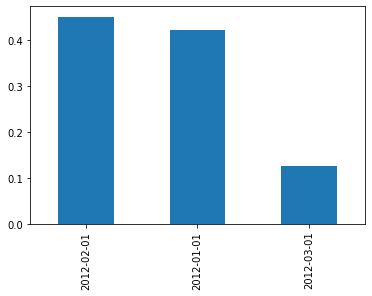

In [3]:
df['origination_date'].value_counts(normalize=True).plot.bar()

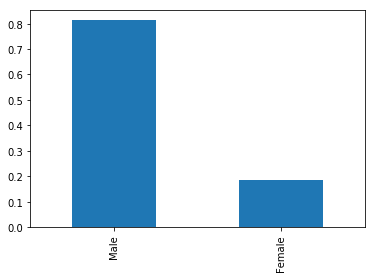

In [3]:
df['Gender'].value_counts(normalize=True).plot.bar()

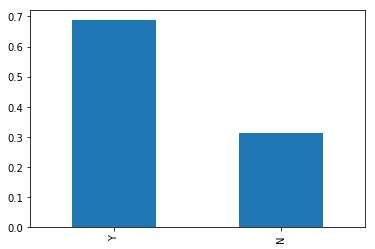

In [4]:
df['Loan_Status'].value_counts(normalize=True).plot.bar()

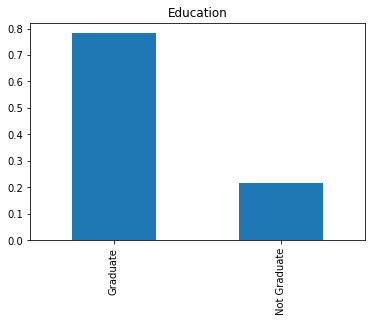

In [5]:
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
# normalize = True gives us easy %age values on the y axis


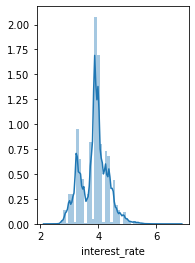

In [47]:
plt.subplot(121)
sns.distplot(df[('interest_rate')])

#plt.subplot(122)
#sns.distplot(df[('CoapplicantIncome')])


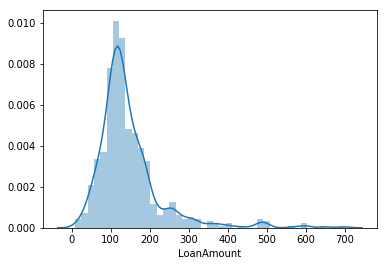

In [7]:
df1 = df
sns.distplot(df1['LoanAmount'].dropna())

## Univariate Analysis - insights

* Majority of the applicants are graduates (~80%)
* Both Applicant-Income and Loan Amount approximately follow normal distribution with a lot of **OUTLIERS** on the right
* Given, most of the applicants are graduates. that has also resulted in 70% of loans being sanctioned - this fact will be   tested in Bivariate Analysis


# Bivariate Analysis
## a) Categorical/Discrete Data

### 1. Gender vs Loan Status

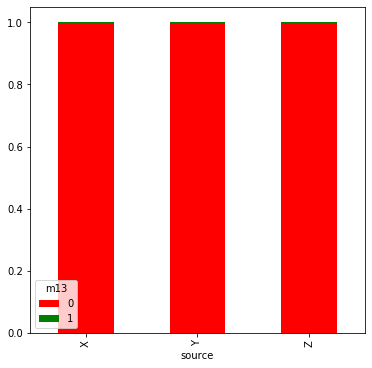

In [7]:
Gender=pd.crosstab(df['source'],df['m13']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

### 2. Area Type vs Loan Status

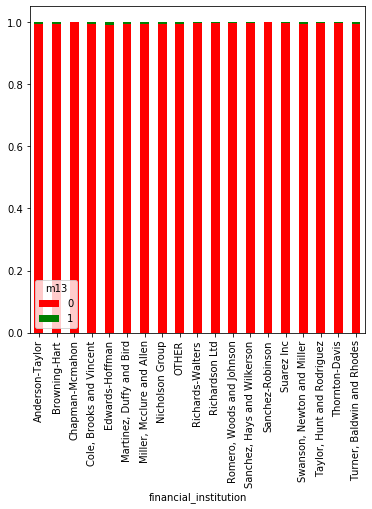

In [11]:
Area=pd.crosstab(df['financial_institution'],df['m13']) 
Area.div(Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

### 3. Credit History vs Loan Status

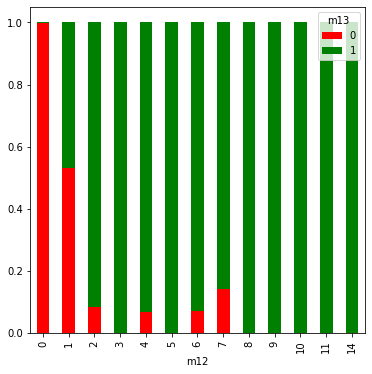

In [351]:
cred=pd.crosstab(df['m12'],df['m13']) 
cred.div(cred.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

### 4. Education vs Loan Status

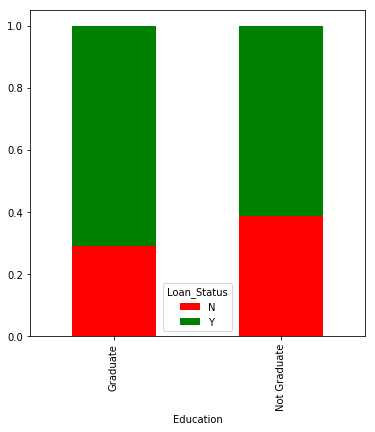

In [11]:
edu=pd.crosstab(df['Education'],df['Loan_Status']) 
edu.div(edu.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

### No of Dependents vs Loan Status

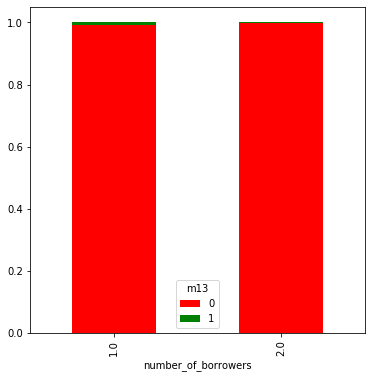

In [18]:
depno=pd.crosstab(df['number_of_borrowers'],df['m13']) 
depno.div(depno.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

## Bivariate Insights - Categorical/Discrete Data

* Although % of Male getting their loan amount sanctioned is marginally higher than their female counterparts, considering the number of males in the dataset from univariate analysis, we can say **Gender has very little to do with Loan Staus atleast in this dataset**.

* **Semi-urban** area type seems to have **higher loan sanction percentage** when compared to rural and urban areas

* This is a no brainer, people with a good credit history have a better loan sanction percentage.

* Graduates fare mariginally better when compared to not graduate

* **no of dependents = 2** has the highest loan sanction percentage while 1,3 are the least sanctioned


## Bi-Variate Analysis - Numerical Data
### 1. Applicant Income

Text(0, 0.5, 'Percentage')

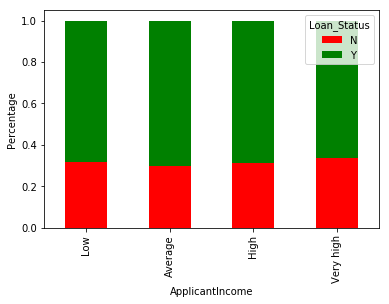

In [13]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,color = ['r','g']) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

### 2. Total Income

Text(0, 0.5, 'Percentage')

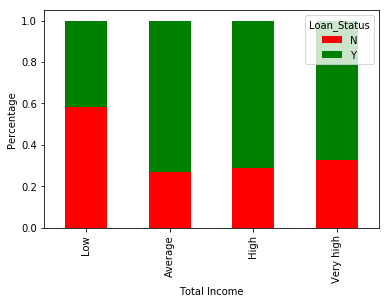

In [14]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,color = ['r','g']) 
plt.xlabel('Total Income') 
plt.ylabel('Percentage')

In [15]:
df_train = df
#df_train=df_train.drop(['Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
df_train['Dependents'].replace('3+', 3,inplace=True) 
df_test['Dependents'].replace('3+', 3,inplace=True) 
df_train['Loan_Status'].replace('N', 0,inplace=True) 
df_train['Loan_Status'].replace('Y', 1,inplace=True)

## Correlation Matrix

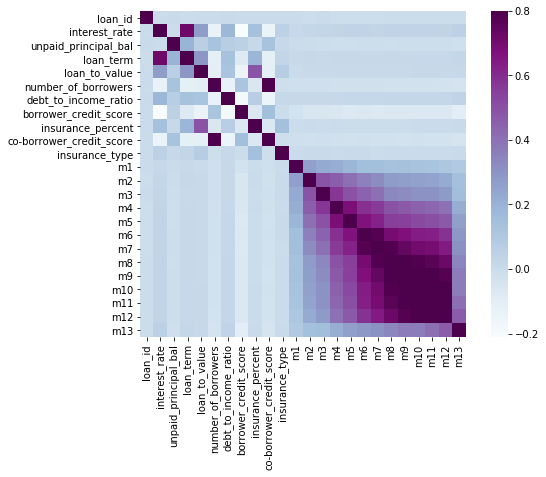

In [21]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [22]:
print(matrix)

                           loan_id  interest_rate  unpaid_principal_bal  \
loan_id                   1.000000      -0.000902              0.005385   
interest_rate            -0.000902       1.000000             -0.002854   
unpaid_principal_bal      0.005385      -0.002854              1.000000   
loan_term                -0.001277       0.720734              0.192168   
loan_to_value             0.000761       0.273379              0.062447   
number_of_borrowers       0.001739      -0.128075              0.130565   
debt_to_income_ratio      0.003894       0.181988              0.073415   
borrower_credit_score     0.001230      -0.210468              0.052061   
insurance_percent         0.000948       0.143116              0.010926   
co-borrower_credit_score  0.001919      -0.138013              0.132632   
insurance_type           -0.000032       0.055883              0.015985   
m1                        0.000389       0.017420              0.001343   
m2                       

## Insights

* Credit History and Loan Status are correlated
* So is Loan Amount and Loan Status from the matrix
* Loan Amount and Co Applicant Income are also relatively correlated

## Cleaning Data

In [17]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bin            0
Total_Income          0
Total_Income_bin      0
dtype: int64

## Categorical Variables - Imputation by Mode

In [18]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True) 
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True) 
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) 
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) 
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)

In [62]:
df=df.drop(columns='financial_institution')

In [5]:
def get_continuous_features(df):
    return df.select_dtypes(include=['number']).columns

def get_categorical_features(df):
    return df.select_dtypes(exclude=['number']).columns

def cast_cont_to_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

In [6]:
cat_features=get_categorical_features(df)
cont_features=get_continuous_features(df)
print(cat_features)
print(cont_features)

Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose'],
      dtype='object')
Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')


In [66]:
df_test=df_test.drop(columns='financial_institution')

In [7]:
from sklearn import preprocessing
for col in df[cat_features]:
    le_all=preprocessing.LabelEncoder()
    le_all.fit(df[col])
    print(le_all.classes_)
    df[col]=le_all.transform(df[col])

['X' 'Y' 'Z']
['Anderson-Taylor' 'Browning-Hart' 'Chapman-Mcmahon'
 'Cole, Brooks and Vincent' 'Edwards-Hoffman' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Nicholson Group' 'OTHER' 'Richards-Walters'
 'Richardson Ltd' 'Romero, Woods and Johnson'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Swanson, Newton and Miller' 'Taylor, Hunt and Rodriguez'
 'Thornton-Davis' 'Turner, Baldwin and Rhodes']
['2012-01-01' '2012-02-01' '2012-03-01']
['02/2012' '03/2012' '04/2012' '05/2012']
['A23' 'B12' 'C86']


In [8]:
df_test=df_test.replace(['Apr-12','Feb-12','Mar-12','May-12'],['04/2012','02/2012','03/2012','05/2012'])

df_test=df_test.replace(['01/01/12','01/02/12','01/03/12'],['2012-01-01','2012-02-01','2012-03-01'])

In [9]:
for col in df_test[cat_features]:
    le_all=preprocessing.LabelEncoder()
    le_all.fit(df_test[col])
    print(le_all.classes_)
    df_test[col]=le_all.transform(df_test[col])

['X' 'Y' 'Z']
['Anderson-Taylor' 'Browning-Hart' 'Chapman-Mcmahon'
 'Cole, Brooks and Vincent' 'Edwards-Hoffman' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Nicholson Group' 'OTHER' 'Richards-Walters'
 'Richardson Ltd' 'Romero, Woods and Johnson'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Swanson, Newton and Miller' 'Taylor, Hunt and Rodriguez'
 'Thornton-Davis' 'Turner, Baldwin and Rhodes']
['2012-01-01' '2012-02-01' '2012-03-01']
['02/2012' '03/2012' '04/2012' '05/2012']
['A23' 'B12' 'C86']


## Numerical Variable(s) - Imputation by Median

In [19]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

In [20]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
Total_Income         0
Total_Income_bin     0
dtype: int64

## Imputation for test data

In [21]:
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True) 
df_test['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) 
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) 
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True) 
df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True) 
df_test['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

In [11]:
df_train = df

## Rectifying 'Right Skewness' - Outlier Treatment
### Through Log Transformation

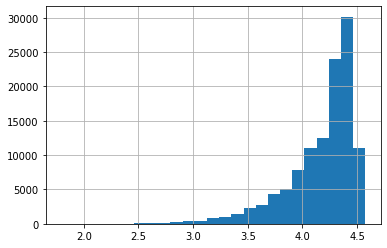

In [12]:
import numpy as np
df_train['loan_to_value_log'] = np.log(df_train['loan_to_value'])
df_test['loan_to_value_log'] = np.log(df_test['loan_to_value'])
df_train['loan_to_value_log'].hist(bins=25)

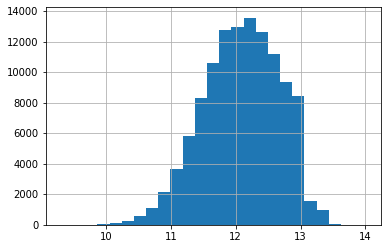

In [13]:
df_train['unpaid_principal_bal_log'] = np.log(df_train['unpaid_principal_bal'])
df_test['unpaid_principal_bal_log'] = np.log(df_test['unpaid_principal_bal'])
df_train['unpaid_principal_bal_log'].hist(bins=25)

In [43]:
scale=preprocessing.RobustScaler()
df1=scale.fit_transform(df)

In [45]:
df1

array([[-0.62371116,  2.        ,  1.42857143, ...,  1.        ,
         0.18626877,  0.81779032],
       [ 0.27611672,  1.        ,  1.        , ...,  1.        ,
        -0.28528089,  0.        ],
       [ 0.43102494,  2.        ,  1.28571429, ...,  1.        ,
         0.82504815, -1.13532091],
       ...,
       [ 0.64311708,  0.        ,  0.        , ...,  0.        ,
        -0.11605161, -0.63787263],
       [-0.1584587 ,  0.        ,  0.        , ...,  0.        ,
        -0.09473236,  0.08082881],
       [ 0.47724882,  2.        ,  1.28571429, ...,  0.        ,
         0.38082579, -2.68270316]])

# Building the Model
## Logistic Regression using Stratified K-Fold

### 1. Pre-processing variables

In [48]:
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'unpaid_principal_bal_log', 'loan_to_value_log'],
      dtype='object')

In [14]:
df_train=df_train.drop(['loan_id','unpaid_principal_bal','loan_to_value'], axis=1)
#df_train=df_train.drop('Loan_ID',axis=1) 
df_test=df_test.drop(['loan_id','unpaid_principal_bal','loan_to_value'],axis=1)
#df_train = df_train.drop('LoanAmount',axis=1)
#df_test = df_test.drop('LoanAmount',axis=1)
X = df_train 
y = df_train.m13
X=pd.get_dummies(X,columns=cat_features)

In [344]:
#X=pd.get_dummies(X,columns=cat_features)

In [396]:
X.head()

,interest_rate,loan_term,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,...,origination_date_0,origination_date_1,origination_date_2,first_payment_date_0,first_payment_date_1,first_payment_date_2,first_payment_date_3,loan_purpose_0,loan_purpose_1,loan_purpose_2
0,4.250,360,1.0,22.0,694.0,30.0,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,4.875,360,1.0,44.0,697.0,0.0,0.0,0.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,3.250,180,1.0,33.0,780.0,0.0,0.0,0.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,4.750,360,2.0,44.0,633.0,0.0,638.0,0.0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,4.750,360,1.0,43.0,681.0,0.0,0.0,0.0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [305]:
cat_features.append([])

TypeError: all inputs must be Index

In [15]:
df_train=pd.get_dummies(df_train,columns=cat_features) 
df_test=pd.get_dummies(df_test,columns=cat_features)

In [398]:
df_train.columns

Index(['interest_rate', 'loan_term', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13',
       'loan_to_value_log', 'unpaid_principal_bal_log', 'source_0', 'source_1',
       'source_2', 'financial_institution_0', 'financial_institution_1',
       'financial_institution_2', 'financial_institution_3',
       'financial_institution_4', 'financial_institution_5',
       'financial_institution_6', 'financial_institution_7',
       'financial_institution_8', 'financial_institution_9',
       'financial_institution_10', 'financial_institution_11',
       'financial_institution_12', 'financial_institution_13',
       'financial_institution_14', 'financial_institution_15',
       'financial_institution_16', 'financial_institution_17',
       'financial_institution_18', 'origination_date_0', 'origination_da

In [360]:
test_features=['interest_rate', 'loan_term', 'number_of_borrowers',
               'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type',
       'loan_to_value_log', 'unpaid_principal_bal_log', 'source_0', 'source_1',
       'source_2', 'financial_institution_0', 'financial_institution_1',
       'financial_institution_2', 'financial_institution_3',
       'financial_institution_4', 'financial_institution_5',
       'financial_institution_6', 'financial_institution_7',
       'financial_institution_8', 'financial_institution_9',
       'financial_institution_10', 'financial_institution_11',
       'financial_institution_12', 'financial_institution_13',
       'financial_institution_14', 'financial_institution_15',
       'financial_institution_16', 'financial_institution_17',
       'financial_institution_18', 'origination_date_0', 'origination_date_1',
       'origination_date_2', 'first_payment_date_0', 'first_payment_date_1',
       'first_payment_date_2', 'first_payment_date_3', 'm1_0', 'm1_1', 'm1_2',
       'm1_3', 'm2_0', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm3_0', 'm3_1', 'm3_2',
       'm3_3', 'm3_4', 'm3_5', 'm4_0', 'm4_1', 'm4_2', 'm4_3', 'm4_4', 'm4_5',
       'm5_0', 'm5_1', 'm5_2', 'm5_3', 'm5_5', 'm5_6', 'm6_0', 'm6_1', 'm6_2',
       'm6_3', 'm6_4', 'm6_6', 'm7_0', 'm7_1', 'm7_2', 'm7_3', 'm7_4', 'm7_5',
       'm7_7', 'm8_0', 'm8_1', 'm8_2', 'm8_3', 'm8_4', 'm8_5', 'm9_0', 'm9_1',
       'm9_2', 'm9_3', 'm9_4', 'm9_5', 'm9_6', 'm10_0', 'm10_1', 'm10_2',
       'm10_3', 'm10_4', 'm10_5', 'm10_6', 'm10_7', 'm11_0', 'm11_1', 'm11_2',
       'm11_3', 'm11_4', 'm11_5', 'm11_6', 'm11_7', 'm11_8', 'm12_0', 'm12_1',
       'm12_2', 'm12_3', 'm12_4', 'm12_5', 'm12_6', 'm12_7', 'm12_8', 'm12_9']

In [365]:
df_tra=df_train[test_features]
df_tra.head()

,interest_rate,loan_term,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,loan_to_value_log,...,m12_0,m12_1,m12_2,m12_3,m12_4,m12_5,m12_6,m12_7,m12_8,m12_9
0,4.250,360,1.0,22.0,694.0,2,30.0,0.0,0.0,4.553877,...,1,0,0,0,0,0,0,0,0,0
1,4.875,360,1.0,44.0,697.0,1,0.0,0.0,0.0,4.276666,...,1,0,0,0,0,0,0,0,0,0
2,3.250,180,1.0,33.0,780.0,1,0.0,0.0,0.0,3.891820,...,1,0,0,0,0,0,0,0,0,0
3,4.750,360,2.0,44.0,633.0,1,0.0,638.0,0.0,3.828641,...,0,1,0,0,0,0,0,0,0,0
4,4.750,360,1.0,43.0,681.0,2,0.0,0.0,0.0,4.382027,...,0,0,0,0,0,0,0,0,0,0


In [403]:
df_test.head()

,interest_rate,loan_term,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,...,origination_date_0,origination_date_1,origination_date_2,first_payment_date_0,first_payment_date_1,first_payment_date_2,first_payment_date_3,loan_purpose_0,loan_purpose_1,loan_purpose_2
0,3.875,360,1,20,790,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,4.500,360,2,33,793,0,784,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,4.500,360,1,34,710,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,4.125,180,2,24,798,0,813,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,3.250,180,2,12,767,0,768,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [33]:
df_train['source'].value_counts()

KeyError: 'source'

# Feature Engineering
### 1. Total Income Column and Log(Total Income) Column

In [26]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome'] 
df_test['Total_Income']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']
df_train['Total_Income_log'] = np.log(df_train['Total_Income'])  
df_test['Total_Income_log'] = np.log(df_test['Total_Income'])

## Removing highly correlated features (Incomes) to reduce noise

In [16]:
df_train=df_train.drop(['number_of_borrowers'], axis=1) 
df_test=df_test.drop(['number_of_borrowers'], axis=1)
df_test.head()

,interest_rate,loan_term,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,...,origination_date_0,origination_date_1,origination_date_2,first_payment_date_0,first_payment_date_1,first_payment_date_2,first_payment_date_3,loan_purpose_0,loan_purpose_1,loan_purpose_2
0,3.875,360,20,790,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,4.500,360,33,793,0,784,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,4.500,360,34,710,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,4.125,180,24,798,0,813,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,3.250,180,12,767,0,768,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [18]:
df_train.head()

,interest_rate,loan_term,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,...,origination_date_0,origination_date_1,origination_date_2,first_payment_date_0,first_payment_date_1,first_payment_date_2,first_payment_date_3,loan_purpose_0,loan_purpose_1,loan_purpose_2
0,4.250,360,22.0,694.0,30.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,4.875,360,44.0,697.0,0.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,3.250,180,33.0,780.0,0.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,4.750,360,44.0,633.0,0.0,638.0,0.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,4.750,360,43.0,681.0,0.0,0.0,0.0,0,1,2,...,0,1,0,0,0,1,0,0,0,1


In [20]:
df_train.head()

,interest_rate,loan_term,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,...,origination_date_0,origination_date_1,origination_date_2,first_payment_date_0,first_payment_date_1,first_payment_date_2,first_payment_date_3,loan_purpose_0,loan_purpose_1,loan_purpose_2
0,4.250,360,22.0,694.0,30.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,4.875,360,44.0,697.0,0.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,3.250,180,33.0,780.0,0.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,4.750,360,44.0,633.0,0.0,638.0,0.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,4.750,360,43.0,681.0,0.0,0.0,0.0,0,1,2,...,0,1,0,0,0,1,0,0,0,1


In [159]:
y=df_train['m13']
from imblearn import over_sampling
sm=over_sampling.SVMSMOTE(random_state=42)
df_train1=df_train.drop('m13',axis=1)
df_train1,y=sm.fit_sample(df_train1,y)

KeyboardInterrupt: 

In [152]:
df_train1=pd.DataFrame(df_train1,columns=['interest_rate', 'loan_term', 'debt_to_income_ratio',
                       'borrower_credit_score', 'insurance_percent', 'insurance_type', 'm1',
                       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
                       'loan_to_value_log', 'unpaid_principal_bal_log', 'source_0',
                       'source_1', 'source_2', 'financial_institution_0',
                       'financial_institution_1', 'financial_institution_2',
                       'financial_institution_3', 'financial_institution_4',
                       'financial_institution_5', 'financial_institution_6',
                       'financial_institution_7', 'financial_institution_8',
                       'financial_institution_9', 'financial_institution_10',
                       'financial_institution_11', 'financial_institution_12',
                       'financial_institution_13', 'financial_institution_14',
                       'financial_institution_15', 'financial_institution_16',
                       'financial_institution_17', 'financial_institution_18',
                       'origination_date_0', 'origination_date_1', 'origination_date_2',
                       'first_payment_date_0', 'first_payment_date_1', 'first_payment_date_2',
                       'first_payment_date_3', 'loan_purpose_0', 'loan_purpose_1',
                       'loan_purpose_2'])

In [378]:
X=df_tra

In [379]:
X.shape

(116058, 118)

## 2. Stratified KFold - 0.7777

In [184]:
from xgboost.sklearn import XGBClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import ensemble,tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
#features=['m7', 'm8', 'm9', 'm10', 'm11', 'm12']
X = df_train.drop(columns=['m13','insurance_type','insurance_percent'])
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    dt_estimator = ensemble.GradientBoostingClassifier(learning_rate=1,n_estimators=300,random_state=100)
    model1 = ensemble.BaggingClassifier(base_estimator=dt_estimator,n_estimators=15,random_state=42,n_jobs=-1)
    model1.fit(xtr, ytr)     
    pred_test1 = model1.predict(xvl)    
    score = accuracy_score(yvl,pred_test1)
    matrix=confusion_matrix(yvl,pred_test1)
    f1=f1_score(yvl,pred_test1)
    p=precision_score(yvl,pred_test1)
    r=recall_score(yvl,pred_test1)
    print('accuracy_score',score)
    print('matrix',matrix)
    print('f1',f1)
    print('pres',p)
    print('rec',r)
    i+=1
    



1 of kfold 5
accuracy_score 0.9953474346271486
matrix [[23047    38]
 [   70    58]]
f1 0.5178571428571429
pres 0.6041666666666666
rec 0.453125

2 of kfold 5
accuracy_score 0.9945717732207479
matrix [[23036    49]
 [   77    50]]
f1 0.44247787610619466
pres 0.5050505050505051
rec 0.3937007874015748

3 of kfold 5


In [118]:
#X = df_train.drop(columns='m13')
importances=pd.Series(model1.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

In [45]:
def plot_feature_importances(estimator, X_train, y_train):
    indices = np.argsort(estimator.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = estimator.feature_importances_[indices][:40] , orient='h')
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title("RF feature importances")

In [49]:
import xgboost as xgb

[0.01912046 0.01467653 0.01966918 0.05433993 0.0073933  0.01266713
 0.03167861 0.03062809 0.02254438 0.03375834 0.02992347 0.01855435
 0.03423965 0.05987963 0.07171667 0.03416304 0.06408565 0.3214346
 0.01353161 0.01431115 0.01546818 0.01416101 0.01095698 0.00520264
 0.01058075 0.         0.         0.00878588 0.         0.01121336
 0.01358838 0.00172705 0.        ]


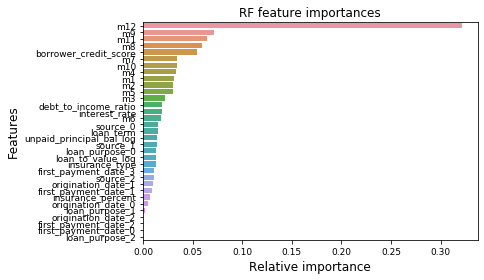

In [80]:
feature_selector = xgb.XGBClassifier()
feature_selector.fit(X, y)
print(feature_selector.feature_importances_)
plot_feature_importances(feature_selector, X, y)

In [33]:
#df_test=df_test.drop(columns=['insurance_type','insurance_percent'])
pred_test1 = model1.predict(df_test)

In [34]:
np.bincount(pred_test1)

array([35724,   142], dtype=int64)

In [117]:
df_test1['m13']=pred_test1
df_test1.to_csv(os.path.join(dir,'submission.csv'), columns=['loan_id','m13'], index=False)

In [147]:
sub=pd.read_csv(os.path.join(dir,"sub.csv"))
sub['m13'].value_counts()

0    35741
1      125
Name: m13, dtype: int64

### 3. Plotting the ROC curve

In [66]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred_test1) 
auc = metrics.roc_auc_score(yvl, pred_test1) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [23211, 35866]

## AUC = 0.7662907

## SKF Linear SVC (from sklearn flowchart for <100k samples) - 0.77777

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
X_f = X
y_f = y
scaler = StandardScaler()
scaler.fit(X_f)
scaler.transform(X_f)
i=1 
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_f,y_f):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LinearSVC(max_iter = 100000)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)    
    i+=1

pred_test2 = model.predict(df_test) 


1 of kfold 10


## Random Forest approach - 0.715277

In [41]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test3 = model.predict(df_test)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.7983870967741935

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7704918032786885

5 of kfold 5
accuracy_score 0.8278688524590164


C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest

## Tuning the Hyper-params of RandomForest using GridSearch

In [55]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
            criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False),       
            fit_params=None, iid=True, n_jobs=1, param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 
                                                            'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       
            pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
            scoring=None, verbose=0)
# Estimating the optimized value 
grid_search.best_estimator_


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

## Random Forest using tuned hyper-params - 0.7638

In [76]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)     
    model2.fit(xtr, ytr)     
    pred_test = model2.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test4 = model2.predict(df_test)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.7950819672131147


### Best Features

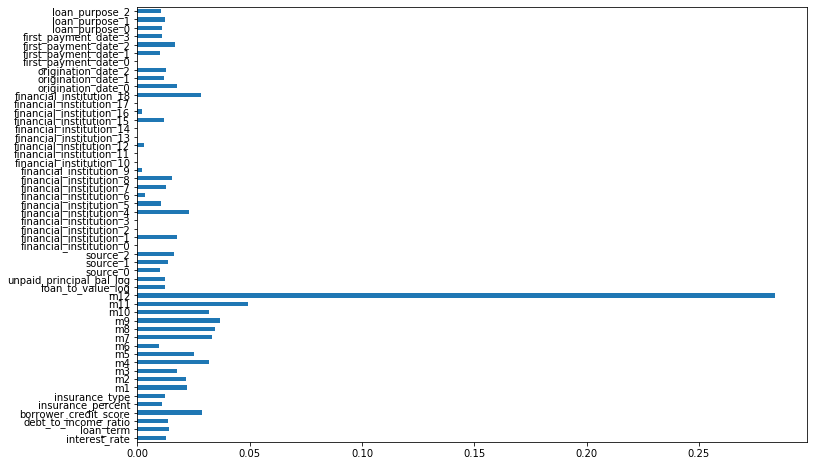

In [287]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

## XGBoost Classifier - 0.729

In [207]:
from xgboost import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=200, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    matrix=confusion_matrix(yvl,pred_test)
    f1=f1_score(yvl,pred_test)
    print('accuracy_score',score)
    print('accuracy_score',score)
    print('matrix',matrix)
    i+=1 
pred_test5 = model.predict(df_test)


1 of kfold 5
accuracy_score 0.995907465644251
accuracy_score 0.995907465644251
matrix [[23068    17]
 [   78    50]]

2 of kfold 5
accuracy_score 0.9950456660348096
accuracy_score 0.9950456660348096
matrix [[23063    22]
 [   93    34]]

3 of kfold 5
accuracy_score 0.9958640299857826
accuracy_score 0.9958640299857826
matrix [[23069    15]
 [   81    46]]

4 of kfold 5
accuracy_score 0.9957347809228383
accuracy_score 0.9957347809228383
matrix [[23059    25]
 [   74    53]]

5 of kfold 5
accuracy_score 0.9963379432165783
accuracy_score 0.9963379432165783
matrix [[23075     9]
 [   76    51]]


In [208]:
np.bincount(pred_test5)

array([35780,    86], dtype=int64)

## Hyper-param tuning of XGBoost Classifier
 

In [412]:
from sklearn.model_selection import GridSearchCV
paramgrid = {
 'max_depth':range(3,30,2),
 'min_child_weight':range(1,20,2)
}
grid_search=GridSearchCV(XGBClassifier(random_state=1),paramgrid)
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise', estimator=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1,
             silent=None, objective='binary:logistic', booster='gbtree',
             n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
             max_delta_step=0, subsample=1, colsample_bytree=1, 
             colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, 
            reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=1, 
            seed=None, missing=None),fit_params=None, iid=False, n_jobs=1, param_grid={'max_depth': [3, 5, 7, 9,11,13,15,17,19,21,23,25,27,29],
                                                     'min_child_weight': [1, 3, 5,7,9,11,13,15,17,19]},
              pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
            scoring=None, verbose=0)
grid_search.best_estimator_


C:\Users\vichu\ana3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(3, 30, 2),
                         'min_child_weight': range(1, 20, 2)},
             pre_dispatch='2*n_jobs', refit=

TypeError: __init__() got an unexpected keyword argument 'fit_params'

## XGBClassifier after param tuning - 0.73611

In [286]:
i=1 
X_f = X
y_f = y
scaler = StandardScaler()
scaler.fit(X_f)
scaler.transform(X_f)
kf = StratifiedKFold(n_splits=7,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_f,y_f):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test6 = model.predict(df_test)

NameError: name 'StandardScaler' is not defined

## AdaBoost - 0.7030

In [285]:
from sklearn.ensemble import AdaBoostClassifier
i=1
kf = StratifiedKFold(n_splits=7,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_f,y_f):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model =  AdaBoostClassifier(n_estimators=100)   
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)
    matrix=confusion_matrix(yvl,pred_test)
    f1=f1_score(yvl,pred_test)
    print('matrix',matrix)
    i+=1 
pred_test7 = model.predict(df_test)

NameError: name 'X_f' is not defined

## Splitting training data into train and test

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

## Stacking

In [167]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((0,1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [168]:
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [169]:
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [170]:
df_train_stack = pd.concat([train_pred1, train_pred2], axis=1)
df_test_stack = pd.concat([test_pred1, test_pred2], axis=1)
model_stack = LogisticRegression(random_state=1,solver='lbfgs',max_iter=15000)
model_stack.fit(df_train_stack,y_train)
model_stack.score(df_test_stack, y_test)

0.827027027027027

## Custom X features and Logistic Regression

In [187]:
X_Train = df_train[['Credit_History','LoanAmount_log','Total_Income_log']]
Y_Train = df_train[['Loan_Status']]
X_Test = df_test[['Credit_History','LoanAmount_log','Total_Income_log']]

x_train, x_test, y_train, y_test = train_test_split(X_Train,Y_Train, test_size =0.3)

model_cust = LogisticRegression(random_state=1,solver='lbfgs',max_iter=15000)     
model_cust.fit(x_train,y_train)
pred_test = model_cust.predict(x_test)     
score = accuracy_score(y_test,pred_test)     
print('accuracy_score',score)
    
pred_test_cust = model_cust.predict(X_Test)

accuracy_score 0.8


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Custom X features and XGB

In [196]:

model_cust =  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0001, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)      
model_cust.fit(x_train,y_train)
pred_test = model_cust.predict(x_test)     
score = accuracy_score(y_test,pred_test)     
print('accuracy_score',score)
    
pred_test_cust = model_cust.predict(X_Test)

accuracy_score 0.7945945945945946


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Submission (Final piece of cell to be run after every different model)

In [197]:
submission=pd.read_csv(r'C:\Users\prana\Desktop\devOPS\datasets\AV_loan_sample_submission.csv')
submission['Loan_Status']=pred_test_cust
df_test2 = pd.read_csv(r'C:\Users\prana\Desktop\devOPS\datasets\AV_loan_test.csv')
submission['Loan_ID']=df_test2['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv(r'C:\Users\prana\Desktop\devOPS\datasets\cust_feat_XGB.csv',index=False)

In [19]:
from catboost import CatBoostClassifier

In [20]:
X = df_train.drop(columns=['m13','insurance_type','insurance_percent'])

In [39]:
m=CatBoostClassifier(n_estimators=1000,random_state=10,eval_metric='Recall',learning_rate=0.05,
                     max_depth=6,od_wait=50,l2_leaf_reg=5,random_strength=100,use_best_model=True)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=2)

In [41]:
m.fit(X_train,y_train,eval_set=[(X,y),(X_test, y_test)], early_stopping_rounds=100,verbose=100)

0:	learn: 0.0963597	test: 0.0990566	test1: 0.1065089	best: 0.1065089 (0)	total: 52.4ms	remaining: 52.3s
100:	learn: 0.2805139	test: 0.2672956	test1: 0.2307692	best: 0.2307692 (93)	total: 5.25s	remaining: 46.7s
200:	learn: 0.3426124	test: 0.3301887	test1: 0.2958580	best: 0.2958580 (197)	total: 11.2s	remaining: 44.5s
300:	learn: 0.4047109	test: 0.3946541	test1: 0.3668639	best: 0.3668639 (286)	total: 16.7s	remaining: 38.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3668639053
bestIteration = 286

Shrink model to first 287 iterations.


In [42]:
pred_test1 = m.predict(df_test)

In [44]:
np.bincount(pred_test1)

array([35783,    83], dtype=int64)

In [43]:
pred_test1=pred_test1.astype(int)

In [253]:
print(lis1t)

<built-in method tolist of numpy.ndarray object at 0x000001890CE30AD0>


In [249]:
df_test1['m13']=pred_test1
df_test1.to_csv(os.path.join(dir,'submission.csv'), columns=['loan_id','m13'], index=False)

In [105]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state=1)

In [114]:
from sklearn import svm